<a href="https://colab.research.google.com/github/NgdHung31/Real_Estate_Regession_Deep_Learning/blob/main/Kaggle_KerassRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Real Estate Price Prediction


In [1]:
%pip install gdown -U -q
%pip install scikit-learn -U -q
# %pip install tensorflow -U -q
!gdown --id 1H98Xv24pGw9jTQO5sJsp6X8xRPfrxiHG --output "./content/dataset_non_outliers_Price_Area.csv"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
/home/dev_ai/anaconda3/envs/real-estate/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1H98Xv24pGw9jTQO5sJsp6X8xRPfrxiHG
To: /home/dev_ai/Real_Estate_Regession_Deep_Learning/content/dataset_non_outliers_Price_Area.csv
100%|██████████████████████████████████████| 9.23M/9.23M [00:01<00:00, 9.16MB/s]


In [2]:
# import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()

In [3]:
# read the csv file
Data = pd.read_csv(
    "./content/dataset_non_outliers_Price_Area.csv", low_memory=False)

# Exploratory Data Analysis


In [ ]:
Data.head(5)

In [ ]:
# get some information about our DataSet
Data.info()
Data.describe().transpose()

In [ ]:
# let's drop unnecessory featurs
# Data = Data.drop('id',axis=1)
# Data = Data.drop('zipcode',axis=1)

In [ ]:
# check if there are any Null values
Data.isnull().sum()

In [ ]:
# visualizing house prices
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 1, 1)
sns.histplot(Data["Price"], kde=True, bins=20)
fig.add_subplot(2, 1, 2)
sns.boxplot(Data["Price"])
plt.tight_layout()

## Feature Engineer


In [4]:
Data = Data.drop(
    labels=[
        "Frontage",
        "Street",
        "Ward",
        "Province",
        "Width",
        "Length",
        "House_orientation",
        "Balcony_orientation",
        "Access_road",
        "Posting_date",
        "Expiry_date",
        "Type_of_listing",
    ],
    axis=1,
)

Data.loc[Data["Property_type"] == "Chung cư", "Number_of_floors"] = 1
Data.loc[pd.isnull(Data["Project_name"]), "Project_name"] = "Other"

Data.isnull().sum()

Property_type             0
Area                      0
Number_of_floors       7146
Number_of_bedrooms     5950
Number_of_toilets     10690
Legal_status              0
Furniture                 0
Project_name              0
District                  0
Distance                  0
Price                     0
dtype: int64

In [6]:
Data = Data.rename(
    columns={
        "Number_of_floors": "Floors",
        "Number_of_bedrooms": "Bedrooms",
        "Number_of_toilets": "Toilets",
    }
)

# Convert object value to numeric value
Data["Toilets"] = Data["Toilets"].replace("Nhiều hơn 6 phòng", 7)
Data["Toilets"] = pd.to_numeric(Data["Toilets"], errors="coerce")

In [7]:
Data = Data.dropna()

/tmp/ipykernel_131988/14768520.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


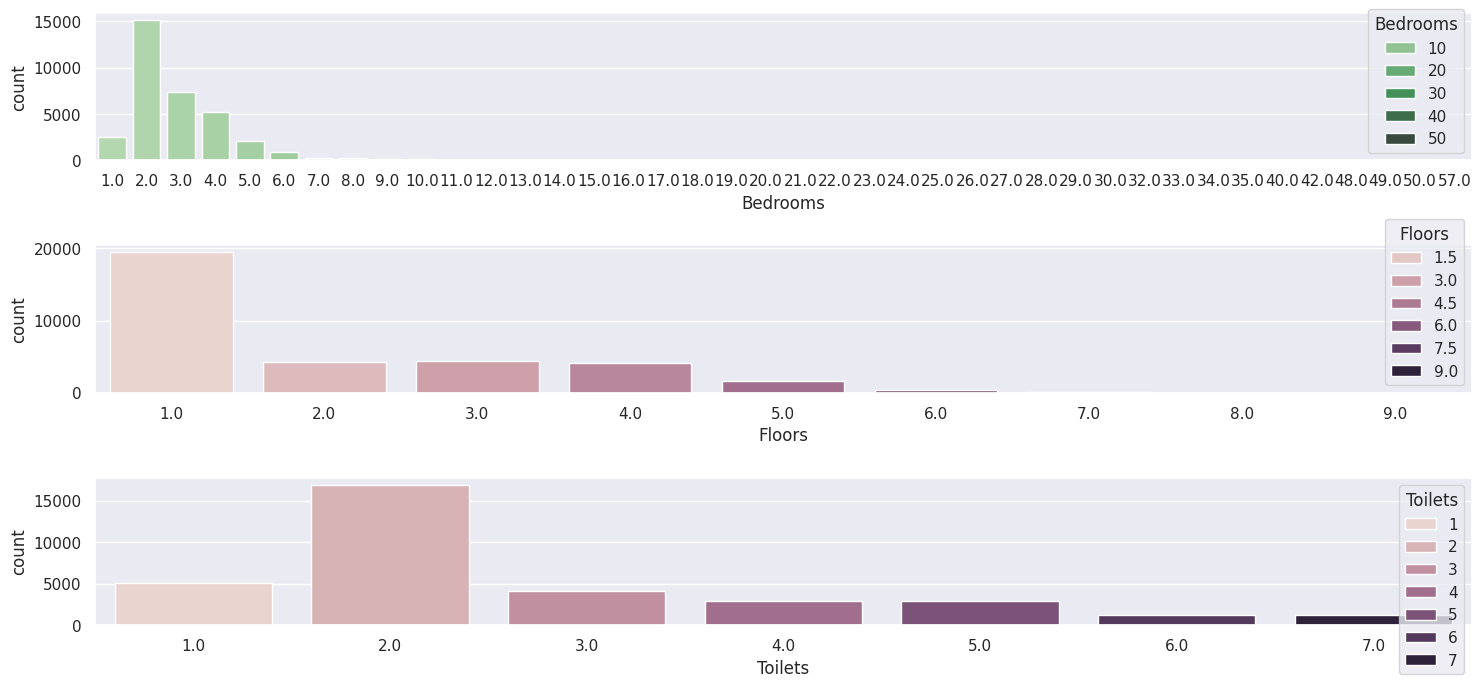

In [8]:
# visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15, 7), constrained_layout=True)
fig.add_subplot(3, 1, 1)
sns.countplot(x="Bedrooms", hue="Bedrooms", data=Data,
              palette="Greens_d", legend=True)
fig.add_subplot(3, 1, 2)
sns.countplot(x="Floors", hue="Floors", data=Data)
fig.add_subplot(3, 1, 3)
sns.countplot(x="Toilets", hue="Toilets", data=Data)
plt.tight_layout()

# Encoding the values


In [ ]:
Data.info()
Data.describe().transpose()

In [9]:
from sklearn.preprocessing import OrdinalEncoder
import pickle

# Create an instance of OrdinalEncoder
Encoder = OrdinalEncoder()
Encoder.set_params(encoded_missing_value=-1)

Categorical_columns = [
    "Property_type",
    "Legal_status",
    "Furniture",
    "Project_name",
    "District",
]

# Fit the encoder to your data
Encoder.fit(Data[Categorical_columns])

# Transform your data using the encoder
Data[Categorical_columns] = Encoder.transform(Data[Categorical_columns])

with open('encoder.pkl', 'wb') as f:
    pickle.dump(Encoder, f)

# Print the encoded data
Data.head(5)

,Property_type,Area,Floors,Bedrooms,Toilets,Legal_status,Furniture,Project_name,District,Distance,Price
0,1.0,80.0,3.0,4.0,3.0,3.0,1.0,428.0,0.0,9.623252,6.5
1,1.0,80.0,3.0,3.0,3.0,3.0,1.0,393.0,0.0,9.623252,7.9
2,1.0,136.5,3.0,4.0,4.0,3.0,1.0,385.0,0.0,9.623252,10.8
3,1.0,95.0,5.0,5.0,4.0,3.0,2.0,1063.0,0.0,14.245030,7.6
4,1.0,90.0,5.0,5.0,4.0,3.0,2.0,1063.0,0.0,14.245030,7.6


In [10]:
# Sử dụng model Machine Learning để dự đoán giá trị bị thiếu
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols = ["Property_type", "Area", "Floors", "Bedrooms", "Toilets"]
impute_it = IterativeImputer()
Data[cols] = impute_it.fit_transform(Data[cols])

Data.isnull().sum()

Property_type    0
Area             0
Floors           0
Bedrooms         0
Toilets          0
Legal_status     0
Furniture        0
Project_name     0
District         0
Distance         0
Price            0
dtype: int64

In [ ]:
Data.head(7)

# Scaling and Train Test Split


In [11]:
from sklearn.model_selection import train_test_split
X = Data.drop("Price", axis=1).values
y = Data["Price"].values

# splitting Train and Test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (27528, 10)
Test size:  (6882, 10)


# Lightning


In [ ]:
# %pip install lightning -U -q

In [12]:
import torch
import lightning as L
# from sklearn import preprocessing
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import OrderedDict
from sklearn import metrics
from torchmetrics import MeanSquaredError, MeanAbsoluteError, R2Score


class LitDataModule(L.LightningDataModule):
    def __init__(self, batch_size, num_workers, data):
        super(LitDataModule, self).__init__()
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.data = data

    def setup(self, stage=None):
        x = self.data.drop('Price', axis=1).values
        y = self.data['Price'].values

        s_scaler = StandardScaler()
        x = s_scaler.fit_transform(x)

        with open('scaler.pkl', 'wb') as f:
            pickle.dump(s_scaler, f)

        dataset = TensorDataset(torch.tensor(
            x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32))

        train_size = int(0.9 * len(dataset))
        test_size = int(0.05 * len(dataset))
        val_size = int(len(dataset) - train_size - test_size)
        print('Train size: ', train_size)
        print('Test size: ', test_size)
        print('Validation size: ', val_size)
        self.train_dataset, self.valid_dataset, self.test_dataset = random_split(
            dataset, [train_size, val_size, test_size])

    def train_dataloader(self):
        dataloader = DataLoader(self.train_dataset,
                                batch_size=self.batch_size,
                                shuffle=True,
                                num_workers=self.num_workers,
                                pin_memory=True,
                                drop_last=False)
        return dataloader

    def val_dataloader(self):
        dataloader = DataLoader(self.valid_dataset,
                                batch_size=self.batch_size,
                                num_workers=self.num_workers,
                                pin_memory=True,
                                drop_last=False)
        return dataloader

    def test_dataloader(self):
        dataloader = DataLoader(self.test_dataset,
                                batch_size=self.batch_size,
                                num_workers=self.num_workers,
                                pin_memory=True,
                                drop_last=False)
        return dataloader

/home/dev_ai/anaconda3/envs/real-estate/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
class LitDNNModule(L.LightningModule):
    def __init__(self, learning_rate=0.02):
        super(LitDNNModule, self).__init__()
        self.learning_rate = learning_rate
        self.loss_fn = nn.MSELoss()
        self.layers = nn.Sequential(OrderedDict(
            self.get_fclayer_list([10, 1024, 256, 128, 128, 64])))

        # Define metrics
        self.mse = MeanSquaredError()
        self.rmse = MeanSquaredError(squared=False)  # RMSE
        self.mae = MeanAbsoluteError()

    # creates a list of hidden layers with given number of neuron in each layer and connects it to the output layer.
    # Relu is used as the activation funtion. No activation function is applied for the last layer output
    def get_fclayer_list(self, hidden_layers, outputs=1):
        input_layers, output_layers = hidden_layers[:-1], hidden_layers[1:]
        layers = []
        for i, (l1, l2) in enumerate(zip(input_layers, output_layers)):
            layers.append((f'fc{i}', nn.Linear(l1, l2)))
            layers.append((f'prelu{i}', nn.PReLU()))
            layers.append((f"dropout{i}", nn.Dropout(0.1)))
        layers.append(('fc_out', nn.Linear(output_layers[-1], outputs)))
        return layers

    def forward(self, x):
        return self.layers(x)

    def shared_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self.forward(x)
        y = y.view(y.size(0), -1)
        loss = self.loss_fn(y, y_pred)
        return loss, y_pred

    def configure_optimizers(self):
        optimizer = optim.Adadelta(
            self.parameters(), lr=self.learning_rate, rho=0.9, eps=1e-6, weight_decay=0)
        # scheduler = optim.lr_scheduler.CosineAnnealingLR(
        #     optimizer, T_max=20, eta_min=0.0, verbose=True
        # )

        return {"optimizer": optimizer,
                # "lr_scheduler": {
                #     "scheduler": scheduler,
                #     "monitor": "train_loss",
                #     "frequency": 1,
                # },
                }

    def training_step(self, batch, batch_idx):
        loss, y_pred = self.shared_step(batch, batch_idx)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, y_pred = self.shared_step(batch, batch_idx)
        self.log("val_loss", loss)
        return {"val_loss": loss}

    def test_step(self, batch, batch_idx):
        x, y = batch
        y = y.to('cpu')
        y = y.view(y.size(0), -1)
        loss, y_pred = self.shared_step(batch, batch_idx)
        y_pred = y_pred.to('cpu')
        VarScore = metrics.explained_variance_score(y, y_pred)
        mse = self.mse(y_pred, y)
        rmse = self.rmse(y_pred, y)
        mae = self.mae(y_pred, y)
        self.log('Varian Score: ', VarScore)
        self.log('MSE Score', mse)
        self.log('RMSE Score', rmse)
        self.log('MAE Score', mae)
        return y_pred, VarScore, mse, rmse, mae

In [ ]:
from argparse import Namespace
import torch
from lightning import seed_everything
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import LearningRateMonitor
from lightning.pytorch.tuner import Tuner

torch.set_float32_matmul_precision("highest")
# Define hparams
hparams = Namespace(
    checkpoint_name='./checkpoint/final.ckpt',
    data_folder='./content',
    default_root_dir='./logs',
    gpus=(-1 if torch.cuda.is_available() else 0),
    auto_select_gpus=True,
    deterministic=True,
    fast_dev_run=False
)

lr_monitor = LearningRateMonitor(logging_interval='epoch')
early_stop_callback = EarlyStopping(
    monitor='val_loss', min_delta=1e-7, patience=160, verbose=True, mode='min', log_rank_zero_only=True)
seed_everything(101)

ml_module = LitDNNModule(learning_rate=0.05)
data_module = LitDataModule(batch_size=64, num_workers=6, data=Data)
# data_module.setup()
model_trainer = L.Trainer(
    accelerator="gpu", default_root_dir='./logs', callbacks=[early_stop_callback, lr_monitor], max_epochs=10000)
model_trainer.logger = L.pytorch.loggers.TensorBoardLogger('logs/', name='exp')

# tuner = Tuner(model_trainer)
# lr_finder = tuner.lr_find(ml_module, datamodule=data_module)
# print(lr_finder.results)


def train_model(hparams):
    # model_trainer = pl.Trainer.from_argparse_args(hparams)

    model_trainer.fit(ml_module, datamodule=data_module)
    model_trainer.save_checkpoint(hparams.checkpoint_name)


def test_model(hparams):
    model = LitDNNModule.load_from_checkpoint(hparams.checkpoint_name)
    model_trainer.test(model, datamodule=data_module)


# Call train_model() with hparams
train_model(hparams=hparams)
# test_model(hparams=hparams)

In [ ]:
test_model(hparams=hparams)